<a href="https://colab.research.google.com/github/parvathymr21/ml-algo/blob/main/logistic_reg_lda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from numpy.linalg import det,inv
from math import sqrt,pi
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,roc_curve,accuracy_score,confusion_matrix
from sklearn import preprocessing
import timeit
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.stats import multivariate_normal
import seaborn as sns

In [ ]:
# Sigmoid function

def sigmoid(z):
    return 1/(1+np.exp(-z))

# finding the predicted outputs
def lr(x,w):
    return np.dot(x,w)


# Updating the parameters by gradient descent(first order optimization)
def grd(x,y,w,alpha,iteration):
    for i in range(iteration):
        err = sigmoid(lr(x,w))-y
        gradient = (np.dot(x.T,err))/m
        w = w-(alpha/m)*gradient
    return w

# Computing the cofusion matrix
def Confusion_matrix(y,y_pred,m):
    tp,tn,fp,fn=0,0,0,0
    for j in range(m):
        if y_pred[j] == y[j]==1:
            tp+=1
        elif y_pred[j]==y[j]==-1:
            tn+=1
        elif y_pred[j]==1 and y[j]==-1:
            fp+=1
        elif y_pred[j]==-1 and y[j]==1:
            fn+=1
    return tp,tn,fp,fn   



In [ ]:
# By 2nd order Optimization(Newton's method)

def gradient(x,y,w):
    prob = sigmoid(lr(x,w))
    grad = (np.dot(x.T,(prob-y)))/x.shape[0]
    return grad

def hess(x,y,w):
    prob = sigmoid(lr(x,w))
    result = (1/m)*np.dot(x.T,x)*np.diag(prob)*np.diag(1-prob)
    return result
def update(x,y,w):
    hessianinv = np.linalg.inv(hess(x,y,w))
    grad = gradient(x,y,w)
    w = w - np.dot(hessianinv,grad)
    return w

In [ ]:
#Function for LDA

def ldaLearn(X,y):
#X,y -  training set
#Outputs means - means for each of the classes,covmat -weighted covariance matrix 
    
   # no:of unique classes
    labels = np.unique(y)
    print(labels)
    total_label   = labels.shape[0] 
    total_feature = X.shape[1]
    
    means  = np.zeros([total_label,total_feature])

    r = 0
    for i in labels:
        data = X[np.where(y == i)[0],]
        #print(data)
        m = np.mean(data,axis=0)
        means[r,] = m
        r +=1
    
    X_transpose = np.transpose(X)
    
    covmat = np.cov(X_transpose)
    return means,covmat,labels

def ldaTest(means,covmat,Xtest,ytest,labels):
    # Inputs means, covmat - parameters of the LDA model
    # Xtest ,ytest- test set
    # Outputs acc -  accuracy value ,ypred - predicted class
    
    r = Xtest.shape[0]
    c = means.shape[0]
    res = np.zeros((r,c))
    # class label calculated by finding argument corresponding to the maximum value of probability
    f = 1/(np.sqrt((2*pi)**means.shape[1])*det(covmat))
    for j in range(means.shape[0]):
        res[:,j] = f * np.exp(-0.5*np.array([np.dot(np.dot((Xtest[i,:] - means[j,:]),inv(covmat)),np.transpose(Xtest[i,:] - means[j,:])) for i in range(Xtest.shape[0])]))
    if 0 in labels:
        ypred = np.argmax(res,axis=1)
    else:
        ypred = np.argmax(res,axis=1) +1
    #print(ypred)
    
    res = (ypred == ytest.ravel())
    acc_data = np.where(res)[0]
    acc = len(acc_data)
    return float(acc)/len(ytest),ypred
    #res = (ypred - ytest.ravel())
    #acc = np.count_nonzero(res==0)   
    #return float(acc)/len(ytest),ypred

# Logistic Regression for data1,2,3,4 
# By First order approximation

In [ ]:
data1 =pd.read_excel('data1.xlsx')
x = data1.iloc[:,:-1]
x10 = np.array(x)
y = data1.iloc[:,-1]
y1 = np.array(y)
m,n=x10.shape
from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = Axes3D(fig)
#ax.scatter(x1[:,0],x1[:,1],y1)



z= np.ones(m)
z= z.reshape(m,1)
x1 = np.append(z,x10,axis=1)
m,n =x1.shape
w = np.zeros(n)
w = w.reshape(n,1)
y1 = y1.reshape(-1,1)

iteration = 1000
alpha = 0.5


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=1)

w = grd(x_train,y_train,w,alpha,iteration)
print('The parameters of the model by 1st order optimization:\n',w)
y_pred =[]
s1=[]
#s = sigmoid(lr(x_test[k],w))
# Predicting the output classes corresponding to the computed parameters
for k in range(x_test.shape[0]):
    s=sigmoid(lr(x_test[k],w))
    
    if s<=0.5:
        y_pred.append(-1)
    else:
        y_pred.append(1)
    s1.append(s)

tp,tn,fp,fn = Confusion_matrix(y_test,y_pred,x_test.shape[0])
print('Confusion matrix:',tp,tn,fp,fn)

print('tp:',tp)
print('tn:',tn)
print('fp:',fp)
print('fn:',fn)
print('Accuracy',(tp+tn)/(tp+tn+fp+fn))
recall1=tp/(tp+fn)
prec1 =tp/(tp+fp)
F1 =(2*recall1*prec1)/(recall1+prec1)
print('sensitivity=', tp/(tp+fn))
print('specificity=', tn/(tp+fn))
print('precision=', tp/(tp+fp))
print('F score=',F1)



The parameters of the model by 1st order optimization:
 [[ -0.2518847 ]
 [-19.15711287]
 [  4.63604663]]
Confusion matrix: 8 30 0 22
tp: 8
tn: 30
fp: 0
fn: 22
Accuracy 0.6333333333333333
sensitivity= 0.26666666666666666
specificity= 1.0
precision= 1.0
F score= 0.4210526315789474


<ipython-input-2-f2d6c703d792>:4: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


In [ ]:
data2 =pd.read_excel('data2.xlsx')
x2 = data2.iloc[:,:-1]
x2 = np.array(x2)
y2 = data2.iloc[:,-1]
y2 = np.array(y2)
m2,n2 =x2.shape
m2
z2= np.ones(m2)
z2= z2.reshape(m2,1)
x2 = np.append(z2,x2,axis=1)
m2,n2 =x2.shape
w2 = np.zeros(n2)
w2 = w2.reshape(n2,1)
y2 = y2.reshape(-1,1)

iteration = 100
alpha = 0.05

from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.4,random_state=10)

w2 = grd(x_train2,y_train2,w2,alpha,iteration)
print('The parameters of the model by 1st order optimization:\n',w2)
y_pred2 =[]
s2=[]
for k in range(x_test2.shape[0]):
    s=sigmoid(lr(x_test2[k],w2))
    if s<=0.5:
        y_pred2.append(-1)
    else:
        y_pred2.append(1)
    s2.append(s)
tp2,tn2,fp2,fn2 = Confusion_matrix(y_test2,y_pred2,x_test2.shape[0])
print('tp:',tp2)
print('tn:',tn2)
print('fp:',fp2)
print('fn:',fn2)
recall2 =tp2/(tp2+fn2)
prec2=tp2/(tp2+fp2)
F2=(2*prec2*recall2)/(prec2+recall2)

print('sensitivity=', tp2/(tp2+fn2))
print('specificity=', tn2/(tp2+fn2))
print('precision=', tp2/(tp2+fp2))
print('F score =',F2)
print('Accuracy =',(tp2+tn2)/(tp2+tn2+fp2+fn2))



The parameters of the model by 1st order optimization:
 [[-0.00133951]
 [ 0.0065009 ]
 [-0.37720674]
 [ 0.02000057]]
tp: 3
tn: 38
fp: 0
fn: 39
sensitivity= 0.07142857142857142
specificity= 0.9047619047619048
precision= 1.0
F score = 0.13333333333333333
Accuracy = 0.5125


In [ ]:
data3 =pd.read_excel('data3.xlsx')
x3 = data3.iloc[:,:-1]
x3 = np.array(x3)
y3 = data3.iloc[:,-1]
y3 = np.array(y3)
m3,n3 =x3.shape
m3
z3= np.ones(m3)
z3= z3.reshape(m3,1)
x3 = np.append(z3,x3,axis=1)
m3,n3 =x3.shape
w3 = np.zeros(n3)
w3 = w3.reshape(n3,1)
y3 = y3.reshape(-1,1)

iteration = 1000
alpha = 0.1

from sklearn.model_selection import train_test_split
x_train3,x_test3,y_train3,y_test3=train_test_split(x3,y3,test_size=0.3,random_state=1)


w3 = grd(x_train3,y_train3,w3,alpha,iteration)
print('The parameters of the model by 1st order optimization:\n',w3)
y_pred3,s3=[],[]
for k in range(x_test3.shape[0]):
    s=sigmoid(lr(x_test3[k],w3))
    if s<=0.5:
        y_pred3.append(0)
    else:
        y_pred3.append(1)
    s3.append(s)
def confusion_matrix1(y,y_pred,m):
    tp,tn,fp,fn=0,0,0,0
    for j in range(m):
        if y_pred[j] == y[j]==1:
            tp+=1
        elif y_pred[j]==y[j]==0:
            tn+=1
        elif y_pred[j]==1 and y[j]==0:
            fp+=1
        elif y_pred[j]==0 and y[j]==1:
            fn+=1   
    return tp,tn,fp,fn
tp3,tn3,fp3,fn3=confusion_matrix1(y_test3,y_pred3,x_test3.shape[0])
print('tp:',tp3)
print('tn:',tn3)
print('fp:',fp3)
print('fn:',fn3)

recall3=tp3/(tp3+fn3)
prec3=tp3/(tp3+fp3)
f3=(2*prec3*recall3)/(prec3+recall3)
print('sensitivity=', tp3/(tp3+fn3))
print('specificity=', tn3/(tp3+fn3))
print('precision=', tp3/(tp3+fp3))
print('F score =',f3)
print('Accuracy =',(tp3+tn3)/(tp3+tn3+fp3+fn3))


The parameters of the model by 1st order optimization:
 [[-0.00036471]
 [-0.24515741]
 [-0.20119832]]
tp: 30
tn: 30
fp: 0
fn: 0
sensitivity= 1.0
specificity= 1.0
precision= 1.0
F score = 1.0
Accuracy = 1.0


In [ ]:
data4 =pd.read_excel('data4.xlsx')
x4 = data4.iloc[:,:-1]
x4 = np.array(x4)
y4 = data4.iloc[:,-1]
y4 = np.array(y4)
m4,n4 =x4.shape
m4
z4= np.ones(m4)
z4= z4.reshape(m4,1)
x4 = np.append(z4,x4,axis=1)
m4,n4 =x4.shape
w4 = np.zeros(n4)
w4 = w4.reshape(n4,1)
y4 = y4.reshape(-1,1)

iteration = 1000
alpha = 0.01

from sklearn.model_selection import train_test_split
x_train4,x_test4,y_train4,y_test4=train_test_split(x4,y4,test_size=0.3,random_state=1)


w4 = grd(x_train4,y_train4,w4,alpha,iteration)
print('The parameters of the model by 1st order optimization:\n',w4)
y_pred4,s4 =[],[]
for k in range(x_test4.shape[0]):
    s=sigmoid(lr(x_test4[k],w4))
    if s<=0.5:
        y_pred4.append(0)
    else:
        y_pred4.append(1)
    s4.append(s)
tp4,tn4,fp4,fn4=confusion_matrix1(y_test4,y_pred4,x_test4.shape[0])
print('tp:',tp4)
print('tn:',tn4)
print('fp:',fp4)
print('fn:',fn4)
recall4=tp4/(tp4+fn4)
prec4=tp4/(tp4+fp4)
f4 =(2*prec4*recall4)/(prec4+recall4)
print('sensitivity=', tp4/(tp4+fn4))
print('specificity=', tn4/(tp4+fn4))
print('precision=', tp4/(tp4+fp4))
print('F score =',f4)
print('Accuracy =',(tp4+tn4)/(tp4+tn4+fp4+fn4))


The parameters of the model by 1st order optimization:
 [[-0.00248384]
 [ 0.03221934]
 [ 0.0350044 ]]
tp: 26
tn: 0
fp: 19
fn: 0
sensitivity= 1.0
specificity= 0.0
precision= 0.5777777777777777
F score = 0.732394366197183
Accuracy = 0.5777777777777777


# Using 2nd order approximation

The parameters of the model by 2nd order optimization:
 [[-1.02838019]
 [-0.26013869]
 [ 0.18403784]]
Confusion matrix 21 30 0 9
tp: 21
tn: 30
fp: 0
fn: 9
Accuracy = 0.85
sensitivity= 0.7
specificity= 1.0
precision= 1.0
F score = 0.8235294117647058


Text(0.5, 1.0, 'Logistic curve for data 1')

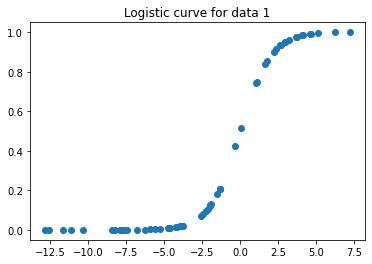

In [ ]:

w1 =np.zeros(n)
w1 = w1.reshape(n,1)
h=np.identity(n)

for i in range(100):
    h = hess(x_train,y_train,w1)
    grad = gradient(x_train,y_train,w1)

w1 = update(x_train,y_train,w1)
print('The parameters of the model by 2nd order optimization:\n',w1)
y_pred1 ,sig=[],[]
for k in range(x_test.shape[0]):
    t=sigmoid(lr(x_test[k],w1))
    if sigmoid(lr(x_test[k],w1))<=0.5:
        y_pred1.append(-1)
    else:
        y_pred1.append(1)
    sig.append(t)
tp1,tn1,fp1,fn1 = Confusion_matrix(y_test,y_pred1,x_test.shape[0])
print('Confusion matrix',tp1,tn1,fp1,fn1)
print('tp:',tp1)
print('tn:',tn1)
print('fp:',fp1)
print('fn:',fn1)
print('Accuracy =',(tp1+tn1)/(tn1+tp1+fp1+fn1))
recall_n1=tp1/(tp1+fn1)
prec_n1=tp1/(tp1+fp1)
f1n=(2*recall_n1*prec_n1)/(recall_n1+prec_n1)
print('sensitivity=', tp1/(tp1+fn1))
print('specificity=', tn1/(tp1+fn1))
print('precision=', tp1/(tp1+fp1))
print('F score =',f1n)
tpr = tp1/(tp1+fn1)
fpr = fp1/(fp1+tn1)

sig = sigmoid((lr(x_test,w1)))
h=lr(x_test,w1)
plt.scatter(h,sig)
plt.title('Logistic curve for data 1')

Parameters of model by 2nd order optimization
 [[-0.24538219]
 [ 0.04301834]
 [-0.18575413]
 [ 0.06415355]]
confusion matrix 29 38 0 13
tp: 29
tn: 38
fp: 0
fn: 13
Accuracy = 0.8375
sensitivity= 0.6904761904761905
specificity= 0.9047619047619048
precision= 1.0
F score = 0.8169014084507042


Text(0.5, 1.0, 'Logistic curve for data 2')

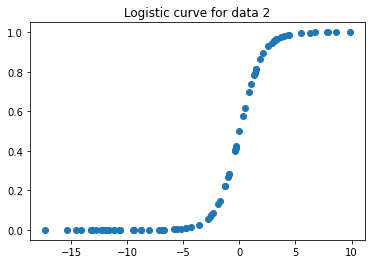

In [ ]:
#data2

w2_new =np.zeros(n2)
w2_new = w2_new.reshape(n2,1)
h=np.identity(n2)
for i in range(100):
    h = hess(x_train2,y_train2,w2_new)
    grad = gradient(x_train2,y_train2,w2_new)

w2_new = update(x_train2,y_train2,w2_new)
print('Parameters of model by 2nd order optimization\n',w2_new)
y_pred2_new =[]
for k in range(x_test2.shape[0]):
    if sigmoid(lr(x_test2[k],w2_new))<=0.5:
        y_pred2_new.append(-1)
    else:
        y_pred2_new.append(1)
tp1,tn1,fp1,fn1 = Confusion_matrix(y_test2,y_pred2_new,x_test2.shape[0])
print('confusion matrix',tp1,tn1,fp1,fn1)
print('tp:',tp1)
print('tn:',tn1)
print('fp:',fp1)
print('fn:',fn1)
print('Accuracy =',(tp1+tn1)/(tn1+tp1+fp1+fn1))
recall_n1=tp1/(tp1+fn1)
prec_n1=tp1/(tp1+fp1)
f1n=(2*recall_n1*prec_n1)/(recall_n1+prec_n1)
print('sensitivity=', tp1/(tp1+fn1))
print('specificity=', tn1/(tp1+fn1))
print('precision=', tp1/(tp1+fp1))
print('F score =',f1n)
sig = sigmoid((lr(x_test2,w2_new)))
h=lr(x_test2,w2_new)
plt.scatter(h,sig)
plt.title('Logistic curve for data 2')

Parameters of model by 2nd order optimization
 [[ 0.05391669]
 [-0.17875224]
 [-0.09468641]]
confusion matrix 30 30 0 0
tp: 30
tn: 30
fp: 0
fn: 0
Accuracy = 1.0
sensitivity= 1.0
specificity= 1.0
precision= 1.0
F score = 1.0


Text(0.5, 1.0, 'Logistic curve for data 4')

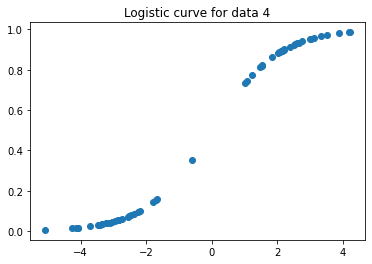

In [ ]:
w3_new =np.zeros(n3)
w3_new = w3_new.reshape(n3,1)
h=np.identity(n3)
for i in range(100):
    h = hess(x_train3,y_train3,w3_new)
    grad = gradient(x_train3,y_train3,w3_new)

w3_new = update(x_train3,y_train3,w3_new)
print('Parameters of model by 2nd order optimization\n',w3_new)
y_pred3_new =[]
for k in range(x_test3.shape[0]):
    if sigmoid(lr(x_test3[k],w3_new))<=0.5:
        y_pred3_new.append(0)
    else:
        y_pred3_new.append(1)
tp1,tn1,fp1,fn1 = confusion_matrix1(y_test3,y_pred3_new,x_test3.shape[0])
print('confusion matrix',tp1,tn1,fp1,fn1)
print('tp:',tp1)
print('tn:',tn1)
print('fp:',fp1)
print('fn:',fn1)
print('Accuracy =',(tp1+tn1)/(tn1+tp1+fp1+fn1))
recall_n1=tp1/(tp1+fn1)
prec_n1=tp1/(tp1+fp1)
f1n=(2*recall_n1*prec_n1)/(recall_n1+prec_n1)
print('sensitivity=', tp1/(tp1+fn1))
print('specificity=', tn1/(tp1+fn1))
print('precision=', tp1/(tp1+fp1))
print('F score =',f1n)
sig = sigmoid((lr(x_test3,w3_new)))
h=lr(x_test3,w3_new)
plt.scatter(h,sig)
plt.title('Logistic curve for data 4')

Parameters of model by 2nd order optimization
 [[-6.83826912]
 [ 0.21259863]
 [ 0.22483267]]
confusion matrix 26 19 0 0
tp: 26
tn: 19
fp: 0
fn: 0
Accuracy = 1.0
sensitivity= 1.0
specificity= 0.7307692307692307
precision= 1.0
F score = 1.0


Text(0.5, 1.0, 'Logistic curve for data 4')

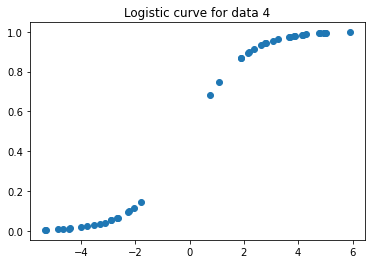

In [ ]:
w4_new =np.zeros(n4)
w4_new = w4_new.reshape(n4,1)
h=np.identity(n4)
for i in range(100):
    h = hess(x_train4,y_train4,w4_new)
    grad = gradient(x_train4,y_train4,w4_new)
   
w4_new = update(x_train4,y_train4,w4_new)
print('Parameters of model by 2nd order optimization\n',w4_new)
y_pred4_new =[]
for k in range(x_test4.shape[0]):
    if sigmoid(lr(x_test4[k],w4_new))<=0.5:
        y_pred4_new.append(0)
    else:
        y_pred4_new.append(1)
tp1,tn1,fp1,fn1 = confusion_matrix1(y_test4,y_pred4_new,x_test4.shape[0])
print('confusion matrix',tp1,tn1,fp1,fn1)
print('tp:',tp1)
print('tn:',tn1)
print('fp:',fp1)
print('fn:',fn1)
print('Accuracy =',(tp1+tn1)/(tn1+tp1+fp1+fn1))
recall_n1=tp1/(tp1+fn1)
prec_n1=tp1/(tp1+fp1)
f1n=(2*recall_n1*prec_n1)/(recall_n1+prec_n1)
print('sensitivity=', tp1/(tp1+fn1))
print('specificity=', tn1/(tp1+fn1))
print('precision=', tp1/(tp1+fp1))
print('F score =',f1n)
sig = sigmoid((lr(x_test4,w4_new)))
h=lr(x_test4,w4_new)

plt.scatter(h,sig)

plt.title('Logistic curve for data 4')

In [ ]:
%%time
#Q2

for i in range(x.shape[0]):
    y1_log =np.log(sigmoid(lr(x1,w1))) 
#print(y1_log)

#
w_lr=[]
def stgrad(data,w,alpha,iterate):
    for i in range(iterate):
        b=np.zeros(n)
        for j in range(m):
            for k in range(n):
                b[k]+=(1/(2*m))*(data[j][k]*w[k]-y1_log[j])*data[j][k]
        w=w-alpha*b
        w_lr.append(w)
    return w
                

w1_lr=np.zeros(n)
alpha=0.001
iterate=500
w1_lr=(stgrad(x1,w1_lr,alpha,iterate))
w1_lr=np.array(w1_lr)

y1_log_pred=x1.dot(w1_lr)


print('Parameters of the model(linear regression):',w1_lr)
print('MSE is',mean_squared_error(y1_log,y1_log_pred))

x=np.array(x)


Parameters of the model(linear regression): [-0.82299448 -0.1607932  -0.07148345]
MSE is 19.744802496868523
Wall time: 3.47 s


Accuracy 1.0
MSE: 1.6000675089182738e-28
parameters of the modelare:
 [-1.02838019] [[ 0.         -0.26013869  0.18403784]]
Wall time: 87.4 ms


Text(0.5, 1.0, 'Decision Boundary')

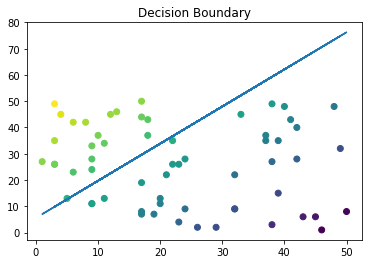

In [ ]:

%%time
for i in range(x.shape[0]):
    y1_log =np.log((sigmoid(lr(x1,w1))/(1-sigmoid(lr(x1,w1))))) 
#print(y1_log)

x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1_log,test_size=0.3,random_state=1)
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
model_lr = LR.fit(x_train1,y_train1)
y_pred_lr = model_lr.predict(x_test1)
print('Accuracy',model_lr.score(x_test1,y_test1))
print('MSE:',mean_squared_error(y_test1,y_pred_lr))
print('parameters of the modelare:\n',model_lr.intercept_,model_lr.coef_)


dec =  -((model_lr.intercept_ + (model_lr.coef_[:,1]*x_test[:,1])) /(model_lr.coef_[:,-1]))

plt.scatter(x=x_test1[:,1],y=x_test1[:,2],c=y_test1)
plt.plot(x_test[:,1],dec)
plt.title('Decision Boundary')

# LDA 
# Data 1,2,3,4,5

[0 1]
[[36.25714286 19.1       ]
 [15.74285714 34.52857143]] 
 [[216.41726619 -14.86330935]
 [-14.86330935 220.23864337]]
Accuracy 0.95
tp: 30
tn: 27
fp: 3
fn: 0
sensitivity= 1.0
specificity= 0.9
precision= 0.9090909090909091
F score = 1.6666666666666667


Text(0, 0.5, 'tpr')

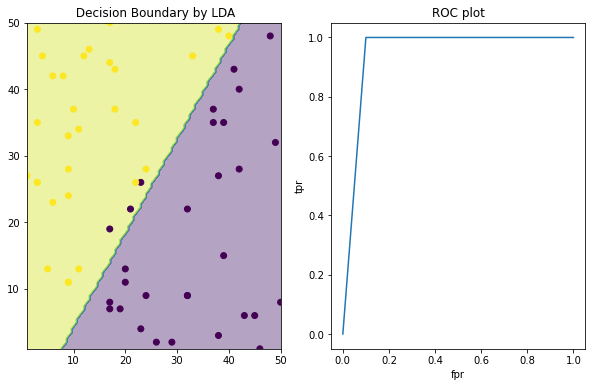

In [ ]:
data = pd.read_excel('data1.xlsx')
data1=data['Unnamed: 2'].replace(to_replace=-1 , value=0)
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
Y = np.array(Y)
X = np.array(X)
data1= np.array(data1)
x_train,x_test,y_train,y_test = train_test_split(X,data1,test_size=0.3,random_state=1)
means,covmat,label1 = ldaLearn(x_train,y_train)
print(means,'\n',covmat)
x_train .shape[0]
acc,res = ldaTest(means,covmat,x_test,y_test,label1)
print('Accuracy',acc)

# Decision Boundary
x1 = np.linspace(X[:,0].min(),X[:,0].max(),100)
x2 = np.linspace(X[:,1].min(),X[:,1].max(),100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
xx[:,1] = xx2.ravel()

fig = plt.figure(figsize=[10,6])


zacc,zldares = ldaTest(means,covmat,xx,np.zeros((xx.shape[0],1)),label1)
plt.subplot(1,2,1)
plt.contourf(x1,x2,zldares.reshape((x1.shape[0],x2.shape[0])),alpha=0.4)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,label="0,1")
plt.title(' Decision Boundary by LDA')
tp,tn,fp,fn = confusion_matrix1(y_test,res,x_test.shape[0])
print('tp:',tp)
print('tn:',tn)
print('fp:',fp)
print('fn:',fn)
recall =tp/(tp+fn)
prec=tp/(tp2+fp)
F2=(2*prec*recall)/(prec+recall)

print('sensitivity=', tp/(tp+fn))
print('specificity=', tn/(tp+fn))
print('precision=', tp/(tp+fp))
print('F score =',F2)
plt.subplot(1,2,2)
fpr,tpr,th1 = roc_curve(y_test,res)
plt.plot(fpr,tpr)
plt.title('ROC plot')
plt.xlabel('fpr')
plt.ylabel('tpr')


[0 1]
[[45.08571429 70.4        44.        ]
 [59.44285714 23.35714286 59.68571429]] 
 [[934.49799589 -78.37774923 -52.14522097]
 [-78.37774923 886.33766701 -50.95447071]
 [-52.14522097 -50.95447071 756.69455293]]
Accuracy 0.9833333333333333
tp: 30
tn: 29
fp: 1
fn: 0
sensitivity= 1.0
specificity= 0.9666666666666667
precision= 0.967741935483871
F score = 1.7647058823529411


Text(0, 0.5, 'tpr')

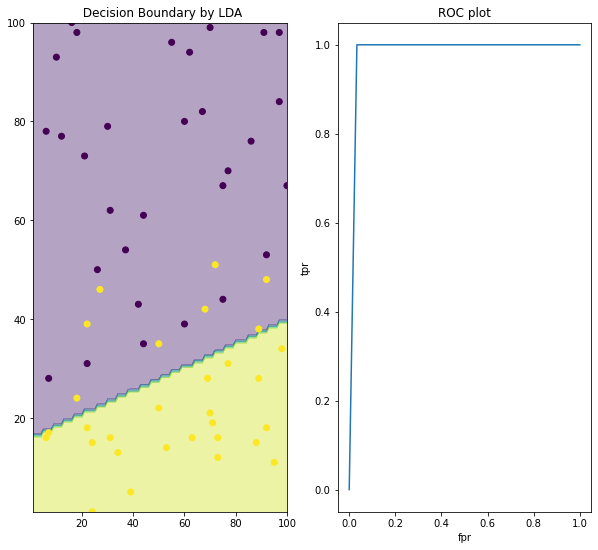

In [ ]:
data2 = pd.read_excel('data2.xlsx')
Y2= data2.iloc[:,-1]
Y2=Y2.replace(to_replace =-1,value=0)
X2 =data2.iloc[:,:-1]
x2 =np.array(X2)
Y2 =np.array(Y2)
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,Y2,test_size=0.3,random_state=1)
means2,covmat2,label2 = ldaLearn(x_train2,y_train2)
print(means2,'\n',covmat2)
#x_train .shape[0]
acc2,res2 = ldaTest(means2,covmat2,x_test2,y_test2,label2)
print('Accuracy',acc2)

x1_n = np.linspace(1,100,100)
x2_n = np.linspace(1,100,100)
xx1_n,xx2_n = np.meshgrid(x1_n,x2_n)
xx_n = np.zeros((x1_n.shape[0]*x2_n.shape[0],3))
xx_n[:,0] = xx1_n.ravel()
xx_n[:,1] = xx2_n.ravel()

fig = plt.figure(figsize=[10,9])
plt.subplot(1, 2, 1)

zacc2,zldares2 = ldaTest(means2,covmat2,xx_n,np.zeros((xx_n.shape[0],1)),label2)
plt.contourf(x1_n,x2_n,zldares2.reshape((x1_n.shape[0],x2_n.shape[0])),alpha=0.4)
plt.scatter(x_test2[:,0],x_test2[:,1],c=y_test2)
plt.title(' Decision Boundary by LDA')
tp,tn,fp,fn = confusion_matrix1(y_test2,res2,x_test2.shape[0])
print('tp:',tp)
print('tn:',tn)
print('fp:',fp)
print('fn:',fn)
recall =tp/(tp+fn)
prec=tp/(tp2+fp)
F2=(2*prec*recall)/(prec+recall)

print('sensitivity=', tp/(tp+fn))
print('specificity=', tn/(tp+fn))
print('precision=', tp/(tp+fp))
print('F score =',F2)
plt.subplot(1,2,2)
fpr,tpr,th1 = roc_curve(y_test2,res2)
plt.plot(fpr,tpr)
plt.title('ROC plot')
plt.xlabel('fpr')
plt.ylabel('tpr')



[0 1]
[[10.93307429  7.27593443]
 [-9.00412371 -9.77862571]] 
 [[111.70782649  92.07859927]
 [ 92.07859927  85.33093521]]
Accuracy 1.0
tp: 30
tn: 30
fp: 0
fn: 0
sensitivity= 1.0
specificity= 1.0
precision= 1.0
F score = 1.8181818181818181


Text(0, 0.5, 'tpr')

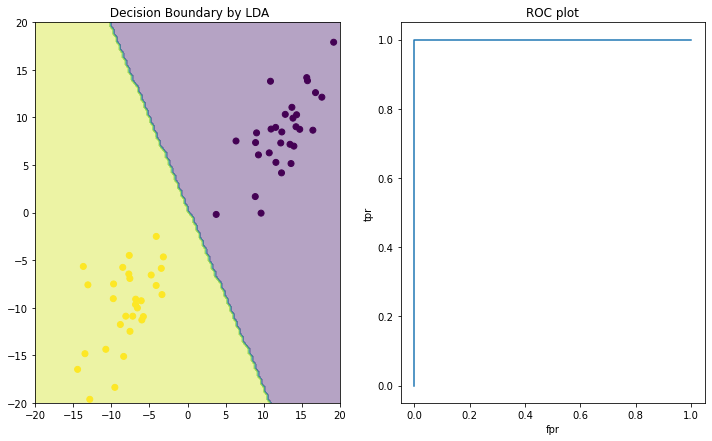

In [ ]:
data3 = pd.read_excel('data3.xlsx')
Y3= data3.iloc[:,-1]
#Y2=Y3.replace(to_replace =-1,value=0)
X3 =data3.iloc[:,:-1]
x3 =np.array(X3)
Y3 = np.array(Y3)
x_train3,x_test3,y_train3,y_test3 = train_test_split(x3,Y3,test_size=0.3,random_state=1)
means3,covmat3,label3 = ldaLearn(x_train3,y_train3)
print(means3,'\n',covmat3)
#x_train .shape[0]
acc3,res3 = ldaTest(means3,covmat3,x_test3,y_test3,label3)
print('Accuracy',acc3)
tp,tn,fp,fn = confusion_matrix1(y_test3,res3,x_test3.shape[0])
print('tp:',tp)
print('tn:',tn)
print('fp:',fp)
print('fn:',fn)
recall =tp/(tp+fn)
prec=tp/(tp2+fp)
F2=(2*prec*recall)/(prec+recall)

print('sensitivity=', tp/(tp+fn))
print('specificity=', tn/(tp+fn))
print('precision=', tp/(tp+fp))
print('F score =',F2)
x31_n = np.linspace(-20,20,100)
x32_n = np.linspace(-20,20,100)
xx31_n,xx32_n = np.meshgrid(x31_n,x32_n)
xx_3n = np.zeros((x31_n.shape[0]*x32_n.shape[0],2))
xx_3n[:,0] = xx31_n.ravel()
xx_3n[:,1] = xx32_n.ravel()

fig = plt.figure(figsize=[12,7])
plt.subplot(1, 2, 1)

zacc3,zldares3 = ldaTest(means3,covmat3,xx_3n,np.zeros((xx_3n.shape[0],1)),label3)
plt.contourf(x31_n,x32_n,zldares3.reshape((x31_n.shape[0],x32_n.shape[0])),alpha=0.4)
plt.scatter(x_test3[:,0],x_test3[:,1],c=y_test3)
plt.title(' Decision Boundary by LDA')

plt.subplot(1,2,2)
fpr,tpr,th1 = roc_curve(y_test3,res3)
plt.plot(fpr,tpr)
plt.title('ROC plot')
plt.xlabel('fpr')
plt.ylabel('tpr')



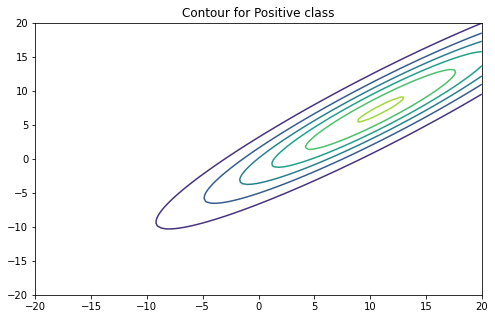

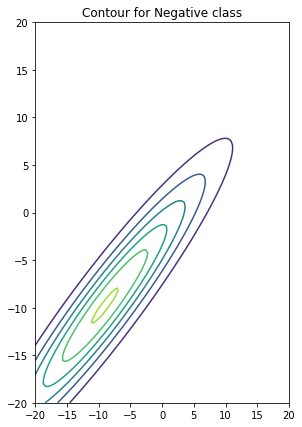

In [ ]:
X,Y = np.meshgrid(x31_n,x32_n)
pos =np.array([X.flatten(),Y.flatten()]).T
rv1 = multivariate_normal(means3[0],covmat3)
fig = plt.figure(figsize=(8,5))
ax0=fig.add_subplot(111)
ax0.contour(X,Y,rv1.pdf(pos).reshape(100,100))
ax0.set_title('Contour for Positive class')
rv2 = multivariate_normal(means3[1],covmat3)
fig = plt.figure(figsize=(10,7))

ax0=fig.add_subplot(122)
ax0.set_title('Contour for Negative class')
ax0.contour(X,Y,rv2.pdf(pos).reshape(100,100))

plt.show()

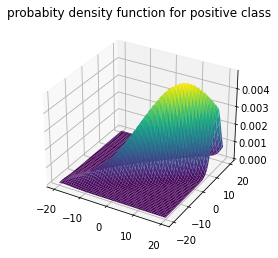

In [ ]:
pos1 = np.empty(X.shape + (2,))
pos1[:,:,0]=X
pos1[:,:,1]=Y
fig = plt.figure()
ax=fig.gca(projection='3d')

#ax.contourf(y_grid,0.1*rv.pdf(pos1),x_grid,zdir='z')
#ax.plot_surface(x_grid,y_grid,rv.pdf(pos1),color='k')
ax.set_title('probabity density function for positive class')
ax.plot_surface(X,Y,rv1.pdf(pos1),cmap='viridis')


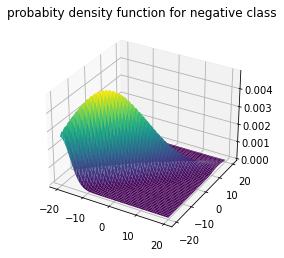

In [ ]:
fig = plt.figure()
ax=fig.gca(projection='3d')

#ax.contourf(y_grid,0.1*rv.pdf(pos1),x_grid,zdir='z')
#ax.plot_surface(x_grid,y_grid,rv.pdf(pos1),color='k')
ax.set_title('probabity density function for negative class')
ax.plot_surface(X,Y,rv2.pdf(pos1),cmap='viridis')

[0 1]
[[0.22119816 0.16589862]
 [0.6702509  0.66769073]] 
 [[0.06769181 0.054936  ]
 [0.054936   0.08096725]]
Accuracy 1.0
tp: 26
tn: 19
fp: 0
fn: 0
sensitivity= 1.0
specificity= 0.7307692307692307
precision= 1.0
F score = 1.793103448275862


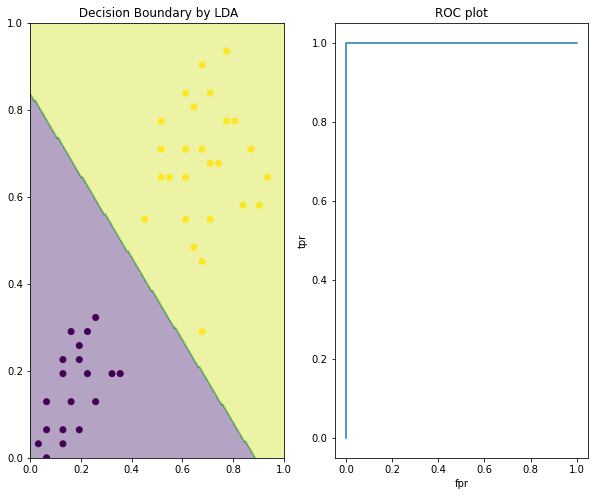

In [ ]:
data4 = pd.read_excel('data4.xlsx')
Y4= data4.iloc[:,-1]
X4 =data4.iloc[:,:-1]
scaler =preprocessing.MinMaxScaler()
X4=scaler.fit_transform(X4)
Y4 = np.array(Y4)
#x2 =np.array(X2)

x_train4,x_test4,y_train4,y_test4 = train_test_split(X4,Y4,test_size=0.3,random_state=1)
means4,covmat4,labels4= ldaLearn(x_train4,y_train4)
print(means4,'\n',covmat4)
#x_train .shape[0]
acc4,res4 = ldaTest(means4,covmat4,x_test4,y_test4,labels4)
print('Accuracy',acc4)
tp,tn,fp,fn = confusion_matrix1(y_test4,res4,x_test4.shape[0])
print('tp:',tp)
print('tn:',tn)
print('fp:',fp)
print('fn:',fn)
recall =tp/(tp+fn)
prec=tp/(tp2+fp)
F2=(2*prec*recall)/(prec+recall)

print('sensitivity=', tp/(tp+fn))
print('specificity=', tn/(tp+fn))
print('precision=', tp/(tp+fp))
print('F score =',F2)
x41_n = np.linspace(0,1,200)
x42_n = np.linspace(0,1,200)
xx41_n,xx42_n = np.meshgrid(x41_n,x42_n)
xx_4n = np.zeros((x41_n.shape[0]*x42_n.shape[0],2))
xx_4n[:,0] = xx41_n.ravel()
xx_4n[:,1] = xx42_n.ravel()

fig = plt.figure(figsize=[10,8])

plt.subplot(1,2,1)
zacc4,zldares4 = ldaTest(means4,covmat4,xx_4n,np.zeros((xx_4n.shape[0],1)),labels4)
plt.contourf(x41_n,x42_n,zldares4.reshape((x41_n.shape[0],x42_n.shape[0])),alpha=0.4)
plt.scatter(x_test4[:,0],x_test4[:,1],c=y_test4,label="0,1")
plt.title(' Decision Boundary by LDA')

plt.subplot(1,2,2)
fpr4,tpr4,th4 = roc_curve(y_test4,res4)
plt.plot(fpr4,tpr4)
plt.title('ROC plot')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

[1 2 3]
[[-1.13501488 -0.89212698  1.24594929]
 [ 1.02207658  1.12831199 -0.9462842 ]
 [ 0.08332262 -0.33326408 -0.25862176]] 
 [[ 0.99289944  0.85715688 -0.71050484]
 [ 0.85715688  0.95398529 -0.63630033]
 [-0.71050484 -0.63630033  1.02608627]]
Accuracy 0.8888888888888888
[[26  0  2]
 [ 0 29  4]
 [ 0  4 25]]


Text(0.5, 1.0, ' Decision Boundary by LDA')

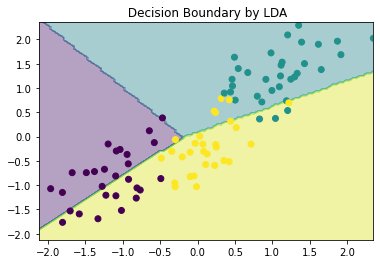

In [ ]:
data5 = pd.read_excel('data5.xlsx')
Y5= data5.iloc[:,-1]
Y5 =np.array(Y5)
X5 =data5.iloc[:,:-1]
scaler1 =preprocessing.StandardScaler()
X5=scaler1.fit_transform(X5)
X5=np.array(X5)


x_train5,x_test5,y_train5,y_test5 = train_test_split(X5,Y5,test_size=0.3,random_state=1)
means5,covmat5,label5 = ldaLearn(x_train5,y_train5)
print(means5,'\n',covmat5)
#x_train .shape[0]
acc5,res5 = ldaTest(means5,covmat5,x_test5,y_test5,label5)
print('Accuracy',acc5)
print(confusion_matrix(y_test5,res5))

x51_n = np.linspace(X5[:,0].min(),X5[:,0].max(),100)
x52_n = np.linspace(X5[:,0].min(),X5[:,0].max(),100)
xx51_n,xx52_n = np.meshgrid(x51_n,x52_n)
xx_5n = np.zeros((x51_n.shape[0]*x52_n.shape[0],3))
xx_5n[:,0] = xx51_n.ravel()
xx_5n[:,1] = xx52_n.ravel()



zacc5,zldares5 = ldaTest(means5,covmat5,xx_5n,np.zeros((xx_5n.shape[0],1)),label5)
plt.contourf(x51_n,x52_n,zldares5.reshape((x51_n.shape[0],x52_n.shape[0])),alpha=0.4)
plt.scatter(x_test5[:,0],x_test5[:,1],c=y_test5)

plt.title(' Decision Boundary by LDA')



In [ ]:
data6=pd.read_csv('heart.csv')
data6.head()
x6 = data6.iloc[:,:-1]
y6 = data6.iloc[:,-1]

X6=np.array(x6)
Y6=np.array(y6)
x_train6,x_test6,y_train6,y_test6 = train_test_split(X6,Y6,test_size=0.3,random_state=1)
means6,covmat6,label6 = ldaLearn(x_train6,y_train6)
#print(means5,'\n',covmat5)
#x_train .shape[0]
acc6,res6 = ldaTest(means6,covmat6,x_test6,y_test6,label6)
print('Accuracy by LDA ',acc6)
tp,tn,fp,fn = confusion_matrix1(y_test6,res6,x_test6.shape[0])
print('tp:',tp)
print('tn:',tn)
print('fp:',fp)
print('fn:',fn)
recall =tp/(tp+fn)
prec=tp/(tp2+fp)
F2=(2*prec*recall)/(prec+recall)

print('sensitivity=', tp/(tp+fn))
print('specificity=', tn/(tp+fn))
print('precision=', tp/(tp+fp))
print('F score =',F2)
#print('Accuracy =',(tp2+tn2)/(tp2+tn2+fp2+fn2))


[0 1]
Accuracy by LDA  0.8051948051948052
tp: 135
tn: 113
fp: 48
fn: 12
sensitivity= 0.9183673469387755
specificity= 0.7687074829931972
precision= 0.7377049180327869
F score = 1.3636363636363635


In [ ]:
data6=pd.read_csv('heart.csv')
x6 = data6.iloc[:,:-1]
x6 = np.array(x6)
y6 = data6.iloc[:,-1]
y6 = np.array(y6)
m6,n6 =x6.shape

z6= np.ones(m6)
z6= z6.reshape(m6,1)
x6 = np.append(z6,x6,axis=1)
m6,n6 =x6.shape
w6 = np.zeros(n6)
w6 = w6.reshape(n6,1)
y6 = y6.reshape(-1,1)

iteration = 100
alpha = 0.05

from sklearn.model_selection import train_test_split
x_train6,x_test6,y_train6,y_test6=train_test_split(x6,y6,test_size=0.4,random_state=10)

w6 = grd(x_train6,y_train6,w6,alpha,iteration)
print('The parameters of the model by 1st order optimization:\n',w6)
y_pred6 =[]
s6=[]
for k in range(x_test6.shape[0]):
    s=sigmoid(lr(x_test6[k],w6))
    if s<=0.5:
        y_pred6.append(0)
    else:
        y_pred6.append(1)
    s6.append(s)
tp2,tn2,fp2,fn2 = confusion_matrix1(y_test6,y_pred6,x_test6.shape[0])
print('tp:',tp2)
print('tn:',tn2)
print('fp:',fp2)
print('fn:',fn2)
recall2 =tp2/(tp2+fn2)
prec2=tp2/(tp2+fp2)
F2=(2*prec2*recall2)/(prec2+recall2)

print('sensitivity=', tp2/(tp2+fn2))
print('specificity=', tn2/(tp2+fn2))
print('precision=', tp2/(tp2+fp2))
print('F score =',F2)
print('Accuracy =',(tp2+tn2)/(tp2+tn2+fp2+fn2))


The parameters of the model by 1st order optimization:
 [[-0.00050022]
 [-0.08587217]
 [-0.00625513]
 [ 0.01552806]
 [-0.13590772]
 [-0.12645833]
 [-0.0007818 ]
 [ 0.00209859]
 [ 0.25295917]
 [-0.0078082 ]
 [-0.02069075]
 [ 0.00672911]
 [-0.0147032 ]
 [-0.00825557]]
tp: 19
tn: 196
fp: 1
fn: 194
sensitivity= 0.0892018779342723
specificity= 0.92018779342723
precision= 0.95
F score = 0.1630901287553648
Accuracy = 0.524390243902439


In [ ]:

data6=pd.read_csv('heart.csv')
data6.head()
x6 = data6.iloc[:,:-1]
y6 = data6.iloc[:,-1]

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(x6)
x6 = pd.DataFrame(d)
#x6_n = d.iloc[:,:-1]
#y6_n = d.iloc[:,-1]
from sklearn.linear_model import LogisticRegression
x_train6,x_test6,y_train6,y_test6 = train_test_split(x6,y6,test_size=0.3,random_state=1)
model6_h = LogisticRegression()
model6_h.fit(x_train6,y_train6)
y_pred6 = model6_h.predict(x_test6)
print('Accuracy by holdout method',model6_h.score(x_test6,y_test6))
print('Mean square eror by holdout method',mean_squared_error(y_test6,y_pred6))
print('parameters of the model by Logistic Regression:\n',model6_h.intercept_,model6_h.coef_)

# Logistic Regression by Kfold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
 
k = 10
kf = KFold(n_splits=k, random_state=None)
model6_kf = LogisticRegression()

result = cross_val_score(model6_kf,x6,y6,cv = kf)
result6 = cross_val_score(model6_kf,x6,y6,scoring='neg_mean_squared_error')
 
print("Avg accuracy by Logistic Regression & Kfold validation: ",result.mean())
print('Mean Square Error by Logistic Regression & Kfold validation:',np.mean(np.absolute(result6)))


# LDA

# holdout
lda6_h = LDA()

#x_train5 = lda.fit(x_train6,y_train6)
#x_test5=lda.transform(x_test5)
model6_lda_h = lda6_h.fit(x_train6,y_train6)
y_pred6_lda_h = lda6_h.predict(x_test6)
print('Parameters of the model by LDA:\n',model6_lda_h.intercept_,model6_lda_h.coef_)
print('MSE  by LDA & Holdout validation',mean_squared_error(y_test6,y_pred6_lda_h))
print('Accuracy by LDA & Holdout validation:',model6_lda_h.score(x_test6,y_test6))
# k fold
model6_lda_kf = LDA()

result_lda = cross_val_score(model6_lda_kf,x6,y6,cv = kf)
result6_lda = cross_val_score(model6_lda_kf,x6,y6,scoring='neg_mean_squared_error')
print('Accuracy by LDA & kfold validation:',(result_lda).mean())
print('Mean Square Error by LDA & kfold validation =',np.mean(np.absolute(result6_lda)))


Accuracy by holdout method 0.801948051948052
Mean square eror by holdout method 0.19805194805194806
parameters of the model by Logistic Regression:
 [1.82236738] [[-0.69643354 -1.32059923  2.27883396 -0.94613375 -0.92008005 -0.05801116
   1.14323536  1.94658566 -1.19249368 -2.58960921  1.12654005 -2.20957155
  -2.05173719]]
Avg accuracy by Logistic Regression & Kfold validation:  0.8467066438225777
Mean Square Error by Logistic Regression & Kfold validation: 0.15317073170731707
Parameters of the model by LDA:
 [2.27386871] [[-0.53507294 -1.4783835   2.94150747 -1.09418832 -1.44903257  0.07534328
   1.36330062  3.1971122  -1.45398291 -3.64171489  1.25810527 -3.06082044
  -3.02566722]]
MSE  by LDA & Holdout validation 0.2012987012987013
Accuracy by LDA & Holdout validation: 0.7987012987012987
Accuracy by LDA & kfold validation: 0.8281934132876453
Mean Square Error by LDA & kfold validation = 0.16878048780487806


In [ ]:

data7=pd.read_excel('arrhythmia.xlsx')
data7.head()
data7=data7.replace(to_replace='?' , value=0)
x7 = data7.iloc[:,:-1]

y7 = data7.iloc[:,-1]

y7=y7.replace(to_replace =-1,value=0)
Y7 = np.array(y7)
x7 =np.array(x7)

x_train7,x_test7,y_train7,y_test7 = train_test_split(x7,Y7,test_size=0.3,random_state=1)
nm=np.cov(x_train7)
means7,covmat7,label7 = ldaLearn(x_train7,y_train7)
#print('\n',covmat7)
np.linalg.det(covmat7)
nm1=np.cov(x_train7.T )

#acc7,res7 = ldaTest(means7,nm,x_test7,y_test7,label7)
#print('Accuracy',acc7)
t=np.dot(np.linalg.inv(np.dot(nm.T,nm)),nm)
np.linalg.inv(np.cov(x_train7.T ))



[ 1  2  3  4  5  6  7  8  9 10 14 15 16]


LinAlgError: Singular matrix

In [ ]:
data7=pd.read_excel('arrhythmia.xlsx')
data7.head()
data7=data7.replace(to_replace='?' , value=0)
x7 = data7.iloc[:,:-1]

y7 = data7.iloc[:,-1]

m7,n7 =x7.shape


x7=np.array(x7)
y7=np.array(y7)
x_train7,x_test7,y_train7,y_test7=train_test_split(x7,y7,test_size=0.4,random_state=1) 
#means7,covmat7,label7 = ldaLearn(x_train7,y_train7)

#acc7,res7 = ldaTest(means7,covmat7,x_test7,y_test7,label7)
#print('Accuracy',acc7)
lda7 = LDA()
x_train7 = lda7.fit_transform(x_train7,y_train7)
x_test7=lda7.transform(x_test7)
model7 = lda7.fit(x_train7,y_train7)
y_pred7 = lda7.predict(x_test7)
print('Accuracy',model7.score(x_test7,y_test7))
#plt.scatter(x_test7[:,1],x_test7[:,8],c=y_test7,cmap='rainbow')

#plt.contour(y_test7,x_test7[:,1])
from sklearn.metrics import classification_report
print('classification report\n',classification_report(y_test7,y_pred7))

print('MSE:',mean_squared_error(y_test7,y_pred7))
print('parameters of the modelare:\n',model7.intercept_,model7.coef_)


Accuracy 0.30386740331491713
classification report
               precision    recall  f1-score   support

           1       0.86      0.40      0.55        95
           2       0.20      0.20      0.20        20
           3       0.14      0.12      0.13         8
           4       0.15      0.50      0.24         4
           5       0.11      0.12      0.12         8
           6       0.12      0.38      0.18         8
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.67      0.33      0.44         6
          10       0.20      0.14      0.17        21
          14       0.14      0.50      0.22         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         7

    accuracy                           0.30       181
   macro avg       0.20      0.21      0.17       181
weighted avg       0.54      0.30      0.37       181

MSE: 44.38121546961326
para

C:\Users\RIJUS OACHIRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RIJUS OACHIRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RIJUS OACHIRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#after preprocessing
scaler1 = preprocessing.MinMaxScaler()
d7 = scaler1.fit_transform(x7)
x7 = pd.DataFrame(d7)
x_train7,x_test7,y_train7,y_test7 = train_test_split(x7,y7,test_size=0.3,random_state=1)
#x7_n = d7.iloc[:,:-1]
#y7_n = d7.iloc[:,-1]
model7_h = LogisticRegression()
model7_h.fit(x_train7,y_train7)
y_pred7h = model7_h.predict(x_test7)
print('Accuracy ',model7_h.score(x_test7,y_test7))
print('Mean square eror ',mean_squared_error(y_test7,y_pred7h))
print('parameters of the model by Logistic Regression:\n',model7_h.intercept_,model7_h.coef_)

Accuracy  0.7647058823529411
Mean square eror  18.477941176470587
parameters of the model by Logistic Regression:
 [-0.08436573  0.7677251   0.12406545  0.01143708  0.08226687 -0.27168254
 -0.01736371 -0.1127539  -0.16177962 -0.4912287  -0.22894246  0.21632981
  0.16629234] [[-0.35701408  0.39009467 -0.13378746 ...  0.53334523  0.16502293
   0.56676012]
 [ 0.60098863  0.3743111  -0.03267854 ... -0.96353057 -0.04927574
  -0.71811253]
 [ 0.14678901 -0.67365391  0.01244326 ...  0.01282023 -0.0971842
  -0.0702367 ]
 ...
 [-0.36278498  0.16618214 -0.00350095 ... -0.18328037  0.3039826
   0.11390837]
 [ 0.30063323  0.58669034 -0.00821455 ... -0.18356976  0.01934698
  -0.10409021]
 [-0.50363721 -0.55316377 -0.07769291 ...  0.19741894  0.05059097
   0.2709052 ]]


C:\Users\RIJUS OACHIRA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# multiclass Logistic regression

print(len(data7))
print(len(Y7))
X7 = pd.concat([pd.Series(1, index=data7.index, name='00'), data7], axis=1)
labels7 =y7.unique()
y17 = np.zeros([data7.shape[0], len(y7.unique())])
y17= pd.DataFrame(y17)

452
452


In [ ]:

# encoding the data

for i in range(0, len(y7.unique())):
    for j in range(0, len(y17)):
        if y7[j] == y7.unique()[i]:
            y17.iloc[j, i] = 1
        else: 
            y17.iloc[j, i] = 0
y17.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(X)
    for i in range(iterations):
        for j in range(0, len(labels7)):
            theta = pd.DataFrame(theta)
            hypothesis = sigmoid(lr(X,theta.iloc[:,j] ))
            for k in range(0, theta.shape[0]):
                theta.iloc[k, j] -= (alpha/m) * np.sum((hypothesis-y.iloc[:, j])*X.iloc[:, k])
            theta = pd.DataFrame(theta)
    return theta

In [ ]:
# finding the parameters for each class
w7 = np.zeros([data7.shape[1]+1, y17.shape[1]])
#w7 = pd.DataFrame(w7)
w7 = gradient_descent(X7, y17, w7, 0.001,100)

class_7 = []
for i in range(0, len(labels7)):
    w17 = pd.DataFrame(w7)
    h = sigmoid(lr(X7,w17.iloc[:,i]))
    class_7.append(h)
class_7=pd.DataFrame(class_7)

In [ ]:
acc = 0
for i in range(0, len(labels7)):
    for j in range(len(y17)):
        if y17.iloc[j, i] == 1 and class_7.iloc[i, j] >= 0.5:
            acc += 1
accuracy = acc/len(X7)
print('Accuracy by multiclass logistic regression',accuracy)




Accuracy by multiclass logistic regression 0.2345132743362832
